## **Executive Summary:**

1. ML Model Used : Apriori
2. Operations Perfomed : Data pre-processing, EDA, Feature Selection and Model Execution

## **Introduction:**

During shopping online or watching movies, we often come around of some instances where we get recommendations like - 'You might want to buy this item with that' or 'Movie Recommedation as per your liking' and we sometimes think how come the site knows about my liking. As funny as it seems, this is a prime example of Association Rule where algorithm finds relation between multiple item based on data inputs and helps to drive insights for big online shopping companies or Movie Channels which is also popularly known in real world as **Market - Basket Analysis**

In this code workbook, I have taken a approach to implement the same on a grocessary dataset to find out relationships between items sold.

Link to the Project Request: https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset?datasetId=877335&sortBy=voteCount


## **Data Dictionary:** 
- **Member_number:** Customer Id  
- **Date:** Date of purchase
- **itemDescription:** Description of product purchased


## **HTML Code for Customization:**

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1,h2 {
    text-align: center;
    background-color: pink;
    padding: 20px;
    margin: 0;
    color: black;
    font-family: ariel;
    border-radius: 80px
}

h3 {
    text-align: center;
    border-style: solid;
    border-width: 3px;
    padding: 12px;
    margin: 0;
    color: black;
    font-family: ariel;
    border-radius: 80px;
    border-color: gold;
}

body, p {
    font-family: ariel;
    font-size: 15px;
    color: charcoal;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: ariel;
    color: purple;
}
</style>
""")

## **Flow of Execution:**

1. Loading Necessary Packages
2. Loading dataset
3. Data Pre-Processing
4. Performing EDA
5. Apriori Implementation
6. Result Customization

## **Step - 1 :** Loading Necessary Packages

In [2]:
!pip install apyori  ## Installing apriori library

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=de0900168e996b23053669323ce8c623b04ac8d2c958a76f16480bf58e00ee70
  Stored in directory: /home/tony/.cache/pip/wheels/7f/49/e3/42c73b19a264de37129fadaa0c52f26cf50e87de08fb9804af
Successfully built apyori


In [3]:
import numpy as np # linear algebra
import pandas as pd # Data pre-processing
import seaborn as sns # Required for plotting
import matplotlib.pyplot as plt # Required for plotting

## **Step - 2 :** Loading dataset

In [4]:
df = pd.read_csv("Groceries_dataset.csv") ## Loading dataset
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
df.info() # Checking data type information for validation purposes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


Interpretation: - No Null values should be present 

In [6]:
df.isnull().sum().sort_values(ascending=False) ## Checking availability of NULL values

Member_number      0
Date               0
itemDescription    0
dtype: int64

Note - No NULLs present

## **Step - 3 :** Data Pre-Processing

In [7]:
df['Date'] = pd.to_datetime(df['Date']) ## Type-Conversion from Object to Dateime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


/tmp/ipykernel_39969/2319157033.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date']) ## Type-Conversion from Object to Dateime


In [8]:
df.head() ## Schema check

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


## **Step - 4 :** Performing EDA

### **Step - 4.1 :** Top 10 Sold Items

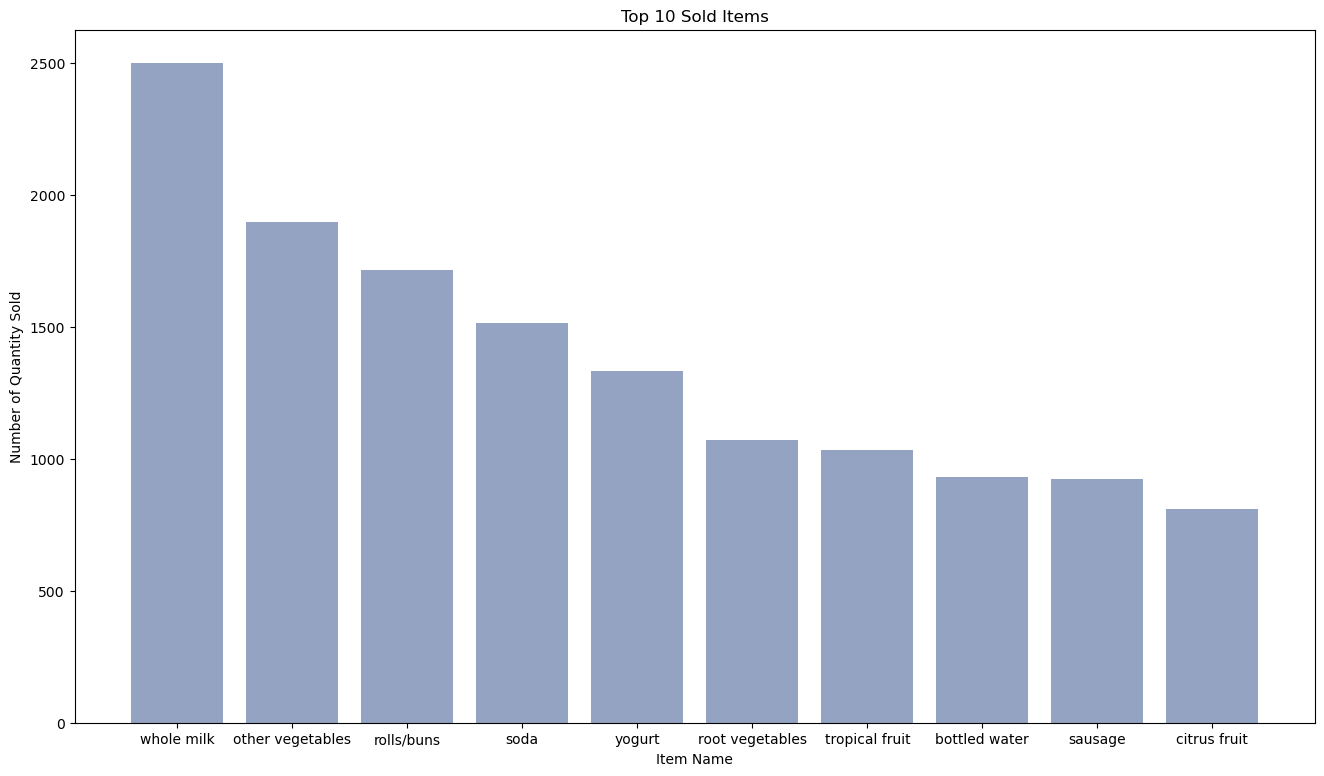

In [10]:
## Creating distribution of Item Sold

Item_distr = df.groupby(by = "itemDescription").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(10)

## Declaring variables

bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

## Defining Figure Size

plt.figure(figsize=(16,9))

# Create bars
plt.bar(x_pos, height, color=(0.3, 0.4, 0.6, 0.6))

# Add title and axis names
plt.title("Top 10 Sold Items")
plt.xlabel("Item Name")
plt.ylabel("Number of Quantity Sold")

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()


### **Step - 4.2 :** Month-Year Sales

In [11]:
df_date=df.set_index(['Date']) ## Setting date as index for plotting purpose
df_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-01-05,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-02-01,3037,whole milk
...,...,...
2014-10-08,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


/tmp/ipykernel_39969/3818121300.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_date.resample("M")['itemDescription'].count().plot(figsize = (20,8), grid = True, title = "Number by Items Sold by Month").set(xlabel = "Date", ylabel = "Number of Items Sold")


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Items Sold')]

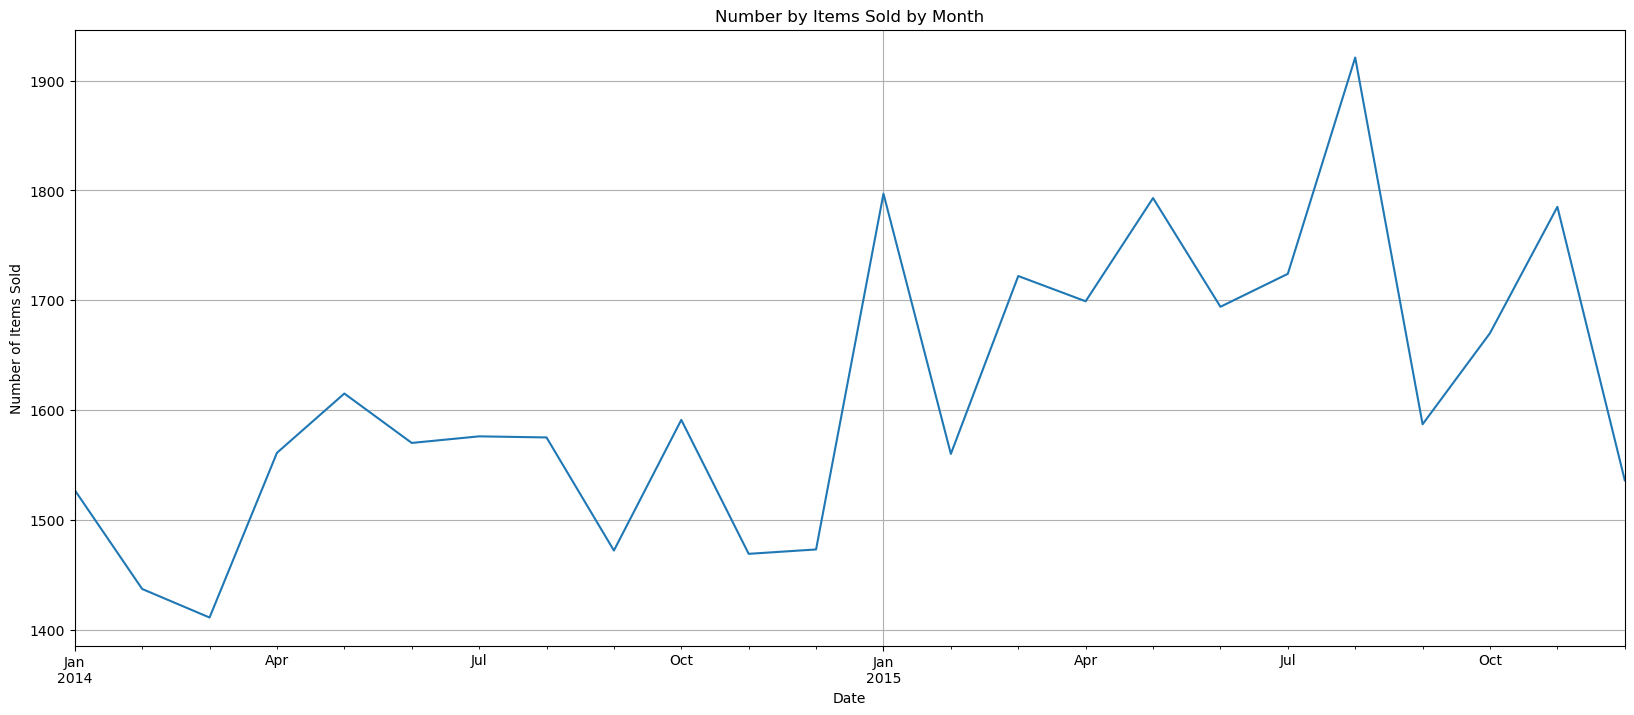

In [12]:
df_date.resample("M")['itemDescription'].count().plot(figsize = (20,8), grid = True, title = "Number by Items Sold by Month").set(xlabel = "Date", ylabel = "Number of Items Sold")

## **Step - 5 :** Apriori Implementation

Apriori is an algorithm for frequent itemset mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent itemsets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.

![](https://lh4.googleusercontent.com/ODPqvTXuc6ZnqnvjcIKaVqKQvvPAV9oqqqrNWvOgJl54Iw-qBSke0UdBOqRu9i0Awj6bEfM7Jedz4f9t8zORrJwrcyQv3OWlcCvI3ZAJjUVEt-gBbvrzJr1XjXAgMqcyu9vvU3y66rkizWjJzQ)

### **Step - 5.1 :** Data Preparation

In [14]:
cust_level = df[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = False) ## Selecting only required variables for modelling
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip() # Removing white spaces if any
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


### **Step - 5.2 :** Create Transaction list

In [34]:
transactions2 = df.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().fillna(0).reset_index()
transactions2.head()

itemDescription,Member_number,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [35]:
def one_hot_encoder(k):
    if k <= 0:
        return 0
    if k >= 1:
        return 1
    
transactions2 = transactions2.iloc[:, 1:transactions2.shape[1]].applymap(one_hot_encoder)
transactions2.head()

/tmp/ipykernel_39969/2194292793.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions2 = transactions2.iloc[:, 1:transactions2.shape[1]].applymap(one_hot_encoder)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### **Step - 5.3 :** Train Model

In [40]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# Finding the most frequent items sold together
frequent_itemsets = apriori(transactions2, min_support=0.025, use_colnames=True, max_len=3).sort_values(by='support')
frequent_itemsets.head(25)


/home/tony/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
161,0.025141,"(shopping bags, butter)"
69,0.025141,(spread cheese)
405,0.025141,"(sliced cheese, whole milk)"
412,0.025141,"(specialty bar, whole milk)"
85,0.025141,"(beef, pip fruit)"
248,0.025141,"(domestic eggs, shopping bags)"
467,0.025141,"(citrus fruit, whole milk, tropical fruit)"
480,0.025141,"(yogurt, frankfurter, whole milk)"
119,0.025141,"(chocolate, bottled water)"
239,0.025141,"(dessert, root vegetables)"


## **Step - 6 :** Result Customization

In [41]:
# Finding the most frequent items sold together
# Creating association rules for indicating astecedent and consequent items
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values('lift', ascending=False)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules.head(25)

,antecedents,consequents,support,confidence,lift
874,"(yogurt, rolls/buns)",(sausage),0.035659,0.320276,1.554717
879,(sausage),"(yogurt, rolls/buns)",0.035659,0.173101,1.554717
456,"(root vegetables, whole milk)",(shopping bags),0.029246,0.258503,1.536046
457,(shopping bags),"(root vegetables, whole milk)",0.029246,0.173780,1.536046
877,(yogurt),"(rolls/buns, sausage)",0.035659,0.126020,1.530298
876,"(rolls/buns, sausage)",(yogurt),0.035659,0.433022,1.530298
947,(sausage),"(yogurt, other vegetables)",0.037199,0.180573,1.500795
942,"(yogurt, other vegetables)",(sausage),0.037199,0.309168,1.500795
631,(shopping bags),"(other vegetables, soda)",0.031042,0.184451,1.485518
630,"(other vegetables, soda)",(shopping bags),0.031042,0.250000,1.485518
